#  Cats and Dogs



In [93]:
%matplotlib inline

In [96]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import vgg16; reload(vgg16)

<module 'vgg16' from 'vgg16.pyc'>

In [97]:
import utils; reload(utils)
from utils import plots

In [98]:
path = "data/dogscats/"
#path = "data/dogscats/sample/"

In [99]:
vg = vgg16.Vgg16()

In [100]:
batch_size = 64

In [101]:
train = vg.get_batches(path+"/train", batch_size=batch_size)
valid = vg.get_batches(path+"/valid", batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
img, labs = next(train)

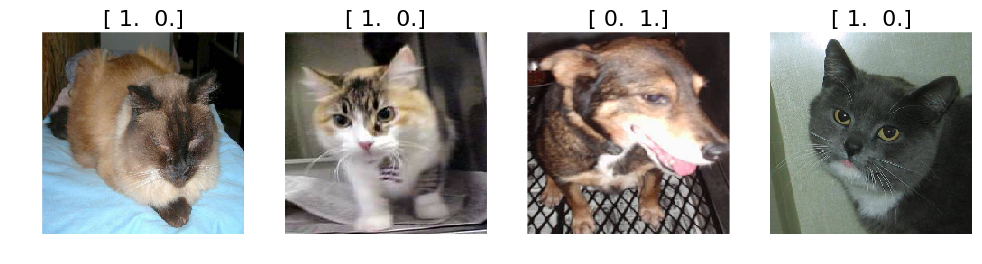

In [9]:
plots(img, titles=labs)

In [103]:
vg.finetune(train)
vg.fit(train, valid)

Epoch 1/1
23000/23000 [==============================] - 637s - loss: 0.1240 - acc: 0.9678 - val_loss: 0.0519 - val_acc: 0.9825


In [104]:
test_path = path+"/test"
print(test_path)

data/dogscats//test


In [88]:
vg.classes

['cats', 'dogs']

In [15]:
test
img.shape

(4, 3, 224, 224)

In [63]:
#img

In [28]:
#test_imgs = next(test)
#res = vgg16.predict(test_imgs)
#len(test_imgs)

4

In [60]:
res

(array([ 0.8345,  0.8622,  0.6768,  0.9821], dtype=float32),
 array([0, 0, 1, 0]),
 ['cats', 'cats', 'dogs', 'cats'])

In [105]:
import pandas as pd
test.filenames
fns = []
dog_probs = []
batch_nums = int(len(test.filenames)/batch_size+1)
start_fid = 0
print("Total number of files:%d"%len(test.filenames))
print("Total batches: %d"%batch_nums)
test = vg.get_batches(test_path, batch_size=batch_size, class_mode=None, shuffle=False)
for batch_id in range(batch_nums):
    fids = range(start_fid, start_fid + batch_size)
    fids = [f for f in fids if f < len(test.filenames)]
    test_imgs = next(test)
    batch_preds = vg.predict(test_imgs)
    batch_probs = batch_preds[0]
    batch_classes = batch_preds[1]
    if batch_id % 50 == 0:
        print("Current batch id = %d"%batch_id)
    if len(batch_probs) != batch_size:
        print("Batch id = %d, Batch size = %d"%(batch_id, len(batch_probs)))
    for ik in range(len(batch_probs)):
        #print("ik = %d, fid = %d"%(ik,fids[ik]))
        fn = test.filenames[fids[ik]]
        fn = fn.split("/")[1].split(".")[0] #Get file ID
        fns.append(fn)
        prob = batch_probs[ik]
        if batch_classes[ik] == 0: #cat
            prob = 1.0 - batch_probs[ik]
        #print(fn)
        dog_probs.append(prob)
    start_fid = start_fid + batch_size
    #print(start_fid)

#print("File names: %s"%fns)
#print("Dog probabilities: %s"%dog_probs)
df = pd.DataFrame({"id":fns, "label":dog_probs})
#print(df)
df.to_csv(path+"/neil_submission.csv", index=False)
print("DONE!")

Total number of files:12500
Total batches: 196
Found 12500 images belonging to 1 classes.
Current batch id = 0
Current batch id = 50
Current batch id = 100
Current batch id = 150
Batch id = 195, Batch size = 20


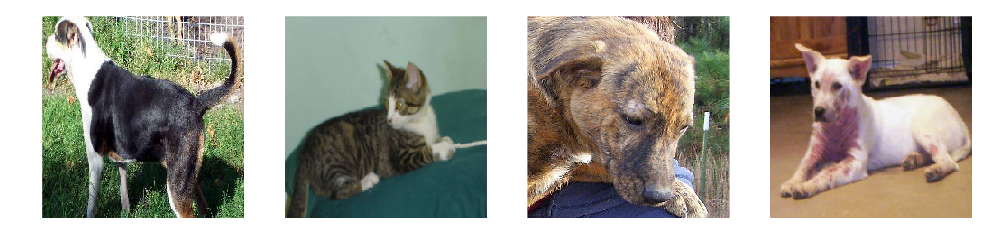

In [29]:
plots(test_imgs)

In [157]:
from os import listdir
from os.path import isfile, join
from keras.preprocessing import image
import vgg16 as vg
onlyfiles = [f for f in listdir(test_path) if isfile(join(test_path, f))]
igen = image.ImageDataGenerator()
for fname in onlyfiles:
    print(fname)
    img = image.load_img(os.path.join(test_path, fname),grayscale=False, target_size=(224,224))
    x = image.img_to_array(img)
    x = igen.random_transform(x)
    x = igen.standardize(x)
    x = vg.vgg_preprocess(x)
    print(len(x))
    break



10001.jpg
3


In [137]:
onlyfiles

['10001.jpg',
 '10002.jpg',
 '10008.jpg',
 '10005.jpg',
 '10003.jpg',
 '10006.jpg',
 '10000.jpg',
 '10004.jpg',
 '10009.jpg',
 '10007.jpg']